### Importação de Bibliotecas

In [1]:
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import statsmodels.stats.api as sms

### Configuração das Bibliotecas

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

### Procesamento do Arquivo Principal

In [3]:
df_lu = pd.read_csv("../ARQUIVOS_FINAIS/CMCT_20200503.csv")
#df_lu.head(3) # Top 3 linhas

#Joga o target para ultima posicao
df_1_ = df_lu.iloc[:,:5]
df_2_ = df_lu.iloc[:,6:]

df_3_ = pd.concat([df_1_,df_2_],axis=1)

df_targ = df_lu[['TARGET']]

df_4_ = pd.concat([df_3_,df_targ],axis=1)

df_lu = df_4_
df_lu.head()

,id,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi02,EDLEpi03,EDLEpi04,EDLEpi05,EDLEpi06,EDLEpi07,EDLEpi08,EDLTotal01,EDLTotal02,EDLTotal03,EDLTotal04,EDLTotal05,EDLTotal06,EDLTotal07,EDLTotal08,HoughEndo,HoughEpi,HoughParede,OctEndoL0001,OctEndoL0002,OctEndoL0003,OctEndoL0004,OctEndoL0005,OctEndoL0006,OctEndoL0007,OctEndoL0008,OctEndoL0101,OctEndoL0102,OctEndoL0103,OctEndoL0104,OctEndoL0105,OctEndoL0106,OctEndoL0107,OctEndoL0108,OctEndoL0201,OctEndoL0202,OctEndoL0203,OctEndoL0204,OctEndoL0205,OctEndoL0206,OctEndoL0207,OctEndoL0208,OctEndoL0301,OctEndoL0302,OctEndoL0303,OctEndoL0304,OctEndoL0305,OctEndoL0306,OctEndoL0307,OctEndoL0308,OctEndoL0401,OctEndoL0402,OctEndoL0403,OctEndoL0404,OctEndoL0405,OctEndoL0406,OctEndoL0407,OctEndoL0408,OctEndoL0501,OctEndoL0502,OctEndoL0503,OctEndoL0504,OctEndoL0505,OctEndoL0506,OctEndoL0507,OctEndoL0508,OctEndoL0601,OctEndoL0602,OctEndoL0603,OctEndoL0604,OctEndoL0605,OctEndoL0606,OctEndoL0607,OctEndoL0608,OctEndoL0701,OctEndoL0702,OctEndoL0703,OctEndoL0704,OctEndoL0705,OctEndoL0706,OctEndoL0707,OctEndoL0708,OctEndoL0801,OctEndoL0802,OctEndoL0803,OctEndoL0804,OctEndoL0805,OctEndoL0806,OctEndoL0807,OctEndoL0808,OctEndoL0901,OctEndoL0902,OctEndoL0903,OctEndoL0904,OctEndoL0905,OctEndoL0906,OctEndoL0907,OctEndoL0908,OctEndoL1001,OctEndoL1002,OctEndoL1003,OctEndoL1004,OctEndoL1005,OctEndoL1006,OctEndoL1007,OctEndoL1008,OctEpiL0001,OctEpiL0002,OctEpiL0003,OctEpiL0004,OctEpiL0005,OctEpiL0006,OctEpiL0007,OctEpiL0008,OctEpiL0101,OctEpiL0102,OctEpiL0103,OctEpiL0104,OctEpiL0105,OctEpiL0106,OctEpiL0107,OctEpiL0108,OctEpiL0201,OctEpiL0202,OctEpiL0203,OctEpiL0204,OctEpiL0205,OctEpiL0206,OctEpiL0207,OctEpiL0208,OctEpiL0301,OctEpiL0302,OctEpiL0303,OctEpiL0304,OctEpiL0305,OctEpiL0306,OctEpiL0307,OctEpiL0308,OctEpiL0401,OctEpiL0402,OctEpiL0403,OctEpiL0404,OctEpiL0405,OctEpiL0406,OctEpiL0407,OctEpiL0408,OctEpiL0501,OctEpiL0502,OctEpiL0503,OctEpiL0504,OctEpiL0505,OctEpiL0506,OctEpiL0507,OctEpiL0508,OctEpiL0601,OctEpiL0602,OctEpiL0603,OctEpiL0604,OctEpiL0605,OctEpiL0606,OctEpiL0607,OctEpiL0608,OctEpiL0701,OctEpiL0702,OctEpiL0703,OctEpiL0704,OctEpiL0705,OctEpiL0706,OctEpiL0707,OctEpiL0708,OctEpiL0801,OctEpiL0802,OctEpiL0803,OctEpiL0804,OctEpiL0805,OctEpiL0806,OctEpiL0807,OctEpiL0808,OctEpiL0901,OctEpiL0902,OctEpiL0903,OctEpiL0904,OctEpiL0905,OctEpiL0906,OctEpiL0907,OctEpiL0908,OctEpiL1001,OctEpiL1002,OctEpiL1003,OctEpiL1004,OctEpiL1005,OctEpiL1006,OctEpiL1007,OctEpiL1008,OctParedeL0001,OctParedeL0002,OctParedeL0003,OctParedeL0004,OctParedeL0005,OctParedeL0006,OctParedeL0007,OctParedeL0008,OctParedeL0101,OctParedeL0102,OctParedeL0103,OctParedeL0104,OctParedeL0105,OctParedeL0106,OctParedeL0107,OctParedeL0108,OctParedeL0201,OctParedeL0202,OctParedeL0203,OctParedeL0204,OctParedeL0205,OctParedeL0206,OctParedeL0207,OctParedeL0208,OctParedeL0301,OctParedeL0302,OctParedeL0303,OctParedeL0304,OctParedeL0305,OctParedeL0306,OctParedeL0307,OctParedeL0308,OctParedeL0401,OctParedeL0402,OctParedeL0403,OctParedeL0404,OctParedeL0405,OctParedeL0406,OctParedeL0407,OctParedeL0408,OctParedeL0501,OctParedeL0502,OctParedeL0503,OctParedeL0504,OctParedeL0505,OctParedeL0506,OctParedeL0507,OctParedeL0508,OctParedeL0601,OctParedeL0602,OctParedeL0603,OctParedeL0604,OctParedeL0605,OctParedeL0606,OctParedeL0607,OctParedeL0608,OctParedeL0701,OctParedeL0702,OctParedeL0703,OctParedeL0704,OctParedeL0705,OctParedeL0706,OctParedeL0707,OctParedeL0708,OctParedeL0801,OctParedeL0802,OctParedeL0803,OctParedeL0804,OctParedeL0805,OctParedeL0806,OctParedeL0807,OctParedeL0808,OctParedeL0901,OctParedeL0902,OctParedeL0903,OctParedeL0904,OctParedeL0905,OctParedeL0906,OctParedeL0907,OctParedeL0908,OctParedeL1001,OctParedeL1002,OctParedeL1003,OctParedeL1004,OctParedeL1005,OctParedeL1006,OctParedeL1007,OctParedeL1008,TotalEndoSpharmL00,TotalEndoSpharmL01,TotalEndoSpharmL02,TotalEndoSpharmL03,TotalEndoSpharmL04,TotalEndoSpharmL05,TotalEndoSpharmL06,TotalEndoSpharmL07,TotalEndoSpharmL08,TotalEndoS

### Neste ponto traduzimos as classes de acordo com os parametros indicados na apresentação 1
#### Registros de 1 a 101 a classe é NORMAL <br />
#### Registros de 102 a 218 a classe é CARDIMIOPATIA DILATADA <br />
#### Registros de 219 a 401 a classe é  CARTIDIOPATIA HIPERTRÓFICA <br />

In [4]:
for ind, row in df_lu.iterrows():
    if (df_lu.loc[ind,'TARGET']==0): df_lu.loc[ind,'class_desc'] = 'SAN' #'NAB' # No Abnormatity
    if (df_lu.loc[ind,'TARGET']==1): df_lu.loc[ind,'class_desc'] = 'CMH' #'HCM' # Hypertrophic cardiomyopathy
    if (df_lu.loc[ind,'TARGET']==2): df_lu.loc[ind,'class_desc'] = 'CMD' #'DCM' # Dilated Cardiomyopathy

#Verifica a quantidade de cada classe
df_lu['class_desc'].value_counts()

#df_pac.dtypes
#df_lu.head(3)

CMH    183
CMD    116
SAN    101
Name: class_desc, dtype: int64

### Análise da feature Sexo

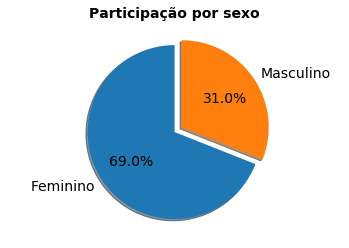

Valores absolutos:


1    276
0    124
Name: sexo, dtype: int64

In [5]:
#Sabemos que sexo é uma variavel importante (conforme pesquisa Fonte), portanto esse 
#desbalanceamento pode ser um problema. Vamos acompanhar ao longo do processo
TOTAL = df_lu.sexo.value_counts()
total_M = TOTAL[1]
total_F = TOTAL[0]

valores = [total_M,total_F]
series = ['Feminino','Masculino']

plt.axis('equal')
plt.rcParams.update({'font.size':14})
plt.rcParams["figure.figsize"] = [5,4]

plt.pie(valores,labels=series,autopct='%1.1f%%',
        explode=(0,0.1),shadow = True,startangle=90,)

plt.title("Participação por sexo",size=14,weight='demibold')
plt.show()

print('Valores absolutos:')
df_lu['sexo'].value_counts()

### Definição das classes que serão utilizadas

In [6]:
#Verifica a quantidade de cada classe
df_final = df_lu
#df_final['class_desc'].value_counts()

#Determinando quais classes uremos utilizar
df_final_1 = df_final[df_final['TARGET']!=1]

df_final_3 = df_final_1

df_final_1['TARGET'].value_counts()

2    116
0    101
Name: TARGET, dtype: int64

### Deleta campos que não serão utilizados

In [7]:
df_final_4 = df_final_3.drop(['class_desc'],axis = 1)
df_final_4 = df_final_4.drop(['id'],axis = 1)
#df_final_4 = df_final_4.drop(['idade'],axis = 1)
#df_final_4 = df_final_4.drop(['sexo'],axis = 1)
#df_final_4 = df_final_4.drop(['volume'],axis = 1)
#df_final_4 = df_final_4.drop(['massa'],axis = 1)
df_final_4.head(3)

,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi02,EDLEpi03,EDLEpi04,EDLEpi05,EDLEpi06,EDLEpi07,EDLEpi08,EDLTotal01,EDLTotal02,EDLTotal03,EDLTotal04,EDLTotal05,EDLTotal06,EDLTotal07,EDLTotal08,HoughEndo,HoughEpi,HoughParede,OctEndoL0001,OctEndoL0002,OctEndoL0003,OctEndoL0004,OctEndoL0005,OctEndoL0006,OctEndoL0007,OctEndoL0008,OctEndoL0101,OctEndoL0102,OctEndoL0103,OctEndoL0104,OctEndoL0105,OctEndoL0106,OctEndoL0107,OctEndoL0108,OctEndoL0201,OctEndoL0202,OctEndoL0203,OctEndoL0204,OctEndoL0205,OctEndoL0206,OctEndoL0207,OctEndoL0208,OctEndoL0301,OctEndoL0302,OctEndoL0303,OctEndoL0304,OctEndoL0305,OctEndoL0306,OctEndoL0307,OctEndoL0308,OctEndoL0401,OctEndoL0402,OctEndoL0403,OctEndoL0404,OctEndoL0405,OctEndoL0406,OctEndoL0407,OctEndoL0408,OctEndoL0501,OctEndoL0502,OctEndoL0503,OctEndoL0504,OctEndoL0505,OctEndoL0506,OctEndoL0507,OctEndoL0508,OctEndoL0601,OctEndoL0602,OctEndoL0603,OctEndoL0604,OctEndoL0605,OctEndoL0606,OctEndoL0607,OctEndoL0608,OctEndoL0701,OctEndoL0702,OctEndoL0703,OctEndoL0704,OctEndoL0705,OctEndoL0706,OctEndoL0707,OctEndoL0708,OctEndoL0801,OctEndoL0802,OctEndoL0803,OctEndoL0804,OctEndoL0805,OctEndoL0806,OctEndoL0807,OctEndoL0808,OctEndoL0901,OctEndoL0902,OctEndoL0903,OctEndoL0904,OctEndoL0905,OctEndoL0906,OctEndoL0907,OctEndoL0908,OctEndoL1001,OctEndoL1002,OctEndoL1003,OctEndoL1004,OctEndoL1005,OctEndoL1006,OctEndoL1007,OctEndoL1008,OctEpiL0001,OctEpiL0002,OctEpiL0003,OctEpiL0004,OctEpiL0005,OctEpiL0006,OctEpiL0007,OctEpiL0008,OctEpiL0101,OctEpiL0102,OctEpiL0103,OctEpiL0104,OctEpiL0105,OctEpiL0106,OctEpiL0107,OctEpiL0108,OctEpiL0201,OctEpiL0202,OctEpiL0203,OctEpiL0204,OctEpiL0205,OctEpiL0206,OctEpiL0207,OctEpiL0208,OctEpiL0301,OctEpiL0302,OctEpiL0303,OctEpiL0304,OctEpiL0305,OctEpiL0306,OctEpiL0307,OctEpiL0308,OctEpiL0401,OctEpiL0402,OctEpiL0403,OctEpiL0404,OctEpiL0405,OctEpiL0406,OctEpiL0407,OctEpiL0408,OctEpiL0501,OctEpiL0502,OctEpiL0503,OctEpiL0504,OctEpiL0505,OctEpiL0506,OctEpiL0507,OctEpiL0508,OctEpiL0601,OctEpiL0602,OctEpiL0603,OctEpiL0604,OctEpiL0605,OctEpiL0606,OctEpiL0607,OctEpiL0608,OctEpiL0701,OctEpiL0702,OctEpiL0703,OctEpiL0704,OctEpiL0705,OctEpiL0706,OctEpiL0707,OctEpiL0708,OctEpiL0801,OctEpiL0802,OctEpiL0803,OctEpiL0804,OctEpiL0805,OctEpiL0806,OctEpiL0807,OctEpiL0808,OctEpiL0901,OctEpiL0902,OctEpiL0903,OctEpiL0904,OctEpiL0905,OctEpiL0906,OctEpiL0907,OctEpiL0908,OctEpiL1001,OctEpiL1002,OctEpiL1003,OctEpiL1004,OctEpiL1005,OctEpiL1006,OctEpiL1007,OctEpiL1008,OctParedeL0001,OctParedeL0002,OctParedeL0003,OctParedeL0004,OctParedeL0005,OctParedeL0006,OctParedeL0007,OctParedeL0008,OctParedeL0101,OctParedeL0102,OctParedeL0103,OctParedeL0104,OctParedeL0105,OctParedeL0106,OctParedeL0107,OctParedeL0108,OctParedeL0201,OctParedeL0202,OctParedeL0203,OctParedeL0204,OctParedeL0205,OctParedeL0206,OctParedeL0207,OctParedeL0208,OctParedeL0301,OctParedeL0302,OctParedeL0303,OctParedeL0304,OctParedeL0305,OctParedeL0306,OctParedeL0307,OctParedeL0308,OctParedeL0401,OctParedeL0402,OctParedeL0403,OctParedeL0404,OctParedeL0405,OctParedeL0406,OctParedeL0407,OctParedeL0408,OctParedeL0501,OctParedeL0502,OctParedeL0503,OctParedeL0504,OctParedeL0505,OctParedeL0506,OctParedeL0507,OctParedeL0508,OctParedeL0601,OctParedeL0602,OctParedeL0603,OctParedeL0604,OctParedeL0605,OctParedeL0606,OctParedeL0607,OctParedeL0608,OctParedeL0701,OctParedeL0702,OctParedeL0703,OctParedeL0704,OctParedeL0705,OctParedeL0706,OctParedeL0707,OctParedeL0708,OctParedeL0801,OctParedeL0802,OctParedeL0803,OctParedeL0804,OctParedeL0805,OctParedeL0806,OctParedeL0807,OctParedeL0808,OctParedeL0901,OctParedeL0902,OctParedeL0903,OctParedeL0904,OctParedeL0905,OctParedeL0906,OctParedeL0907,OctParedeL0908,OctParedeL1001,OctParedeL1002,OctParedeL1003,OctParedeL1004,OctParedeL1005,OctParedeL1006,OctParedeL1007,OctParedeL1008,TotalEndoSpharmL00,TotalEndoSpharmL01,TotalEndoSpharmL02,TotalEndoSpharmL03,TotalEndoSpharmL04,TotalEndoSpharmL05,TotalEndoSpharmL06,TotalEndoSpharmL07,TotalEndoSpharmL08,TotalEndoSpha

### Exportar dataset final com característcas somente morfológicas

In [8]:
df_final_4.to_csv("../EXPERIMENTOS/df_final_20200724.csv", index = False)

### PCA

In [9]:
df_final_5 = pd.read_csv("../EXPERIMENTOS/df_final_20200724.csv")
pca_1 = df_final_5
pca_1.head(3)

,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi02,EDLEpi03,EDLEpi04,EDLEpi05,EDLEpi06,EDLEpi07,EDLEpi08,EDLTotal01,EDLTotal02,EDLTotal03,EDLTotal04,EDLTotal05,EDLTotal06,EDLTotal07,EDLTotal08,HoughEndo,HoughEpi,HoughParede,OctEndoL0001,OctEndoL0002,OctEndoL0003,OctEndoL0004,OctEndoL0005,OctEndoL0006,OctEndoL0007,OctEndoL0008,OctEndoL0101,OctEndoL0102,OctEndoL0103,OctEndoL0104,OctEndoL0105,OctEndoL0106,OctEndoL0107,OctEndoL0108,OctEndoL0201,OctEndoL0202,OctEndoL0203,OctEndoL0204,OctEndoL0205,OctEndoL0206,OctEndoL0207,OctEndoL0208,OctEndoL0301,OctEndoL0302,OctEndoL0303,OctEndoL0304,OctEndoL0305,OctEndoL0306,OctEndoL0307,OctEndoL0308,OctEndoL0401,OctEndoL0402,OctEndoL0403,OctEndoL0404,OctEndoL0405,OctEndoL0406,OctEndoL0407,OctEndoL0408,OctEndoL0501,OctEndoL0502,OctEndoL0503,OctEndoL0504,OctEndoL0505,OctEndoL0506,OctEndoL0507,OctEndoL0508,OctEndoL0601,OctEndoL0602,OctEndoL0603,OctEndoL0604,OctEndoL0605,OctEndoL0606,OctEndoL0607,OctEndoL0608,OctEndoL0701,OctEndoL0702,OctEndoL0703,OctEndoL0704,OctEndoL0705,OctEndoL0706,OctEndoL0707,OctEndoL0708,OctEndoL0801,OctEndoL0802,OctEndoL0803,OctEndoL0804,OctEndoL0805,OctEndoL0806,OctEndoL0807,OctEndoL0808,OctEndoL0901,OctEndoL0902,OctEndoL0903,OctEndoL0904,OctEndoL0905,OctEndoL0906,OctEndoL0907,OctEndoL0908,OctEndoL1001,OctEndoL1002,OctEndoL1003,OctEndoL1004,OctEndoL1005,OctEndoL1006,OctEndoL1007,OctEndoL1008,OctEpiL0001,OctEpiL0002,OctEpiL0003,OctEpiL0004,OctEpiL0005,OctEpiL0006,OctEpiL0007,OctEpiL0008,OctEpiL0101,OctEpiL0102,OctEpiL0103,OctEpiL0104,OctEpiL0105,OctEpiL0106,OctEpiL0107,OctEpiL0108,OctEpiL0201,OctEpiL0202,OctEpiL0203,OctEpiL0204,OctEpiL0205,OctEpiL0206,OctEpiL0207,OctEpiL0208,OctEpiL0301,OctEpiL0302,OctEpiL0303,OctEpiL0304,OctEpiL0305,OctEpiL0306,OctEpiL0307,OctEpiL0308,OctEpiL0401,OctEpiL0402,OctEpiL0403,OctEpiL0404,OctEpiL0405,OctEpiL0406,OctEpiL0407,OctEpiL0408,OctEpiL0501,OctEpiL0502,OctEpiL0503,OctEpiL0504,OctEpiL0505,OctEpiL0506,OctEpiL0507,OctEpiL0508,OctEpiL0601,OctEpiL0602,OctEpiL0603,OctEpiL0604,OctEpiL0605,OctEpiL0606,OctEpiL0607,OctEpiL0608,OctEpiL0701,OctEpiL0702,OctEpiL0703,OctEpiL0704,OctEpiL0705,OctEpiL0706,OctEpiL0707,OctEpiL0708,OctEpiL0801,OctEpiL0802,OctEpiL0803,OctEpiL0804,OctEpiL0805,OctEpiL0806,OctEpiL0807,OctEpiL0808,OctEpiL0901,OctEpiL0902,OctEpiL0903,OctEpiL0904,OctEpiL0905,OctEpiL0906,OctEpiL0907,OctEpiL0908,OctEpiL1001,OctEpiL1002,OctEpiL1003,OctEpiL1004,OctEpiL1005,OctEpiL1006,OctEpiL1007,OctEpiL1008,OctParedeL0001,OctParedeL0002,OctParedeL0003,OctParedeL0004,OctParedeL0005,OctParedeL0006,OctParedeL0007,OctParedeL0008,OctParedeL0101,OctParedeL0102,OctParedeL0103,OctParedeL0104,OctParedeL0105,OctParedeL0106,OctParedeL0107,OctParedeL0108,OctParedeL0201,OctParedeL0202,OctParedeL0203,OctParedeL0204,OctParedeL0205,OctParedeL0206,OctParedeL0207,OctParedeL0208,OctParedeL0301,OctParedeL0302,OctParedeL0303,OctParedeL0304,OctParedeL0305,OctParedeL0306,OctParedeL0307,OctParedeL0308,OctParedeL0401,OctParedeL0402,OctParedeL0403,OctParedeL0404,OctParedeL0405,OctParedeL0406,OctParedeL0407,OctParedeL0408,OctParedeL0501,OctParedeL0502,OctParedeL0503,OctParedeL0504,OctParedeL0505,OctParedeL0506,OctParedeL0507,OctParedeL0508,OctParedeL0601,OctParedeL0602,OctParedeL0603,OctParedeL0604,OctParedeL0605,OctParedeL0606,OctParedeL0607,OctParedeL0608,OctParedeL0701,OctParedeL0702,OctParedeL0703,OctParedeL0704,OctParedeL0705,OctParedeL0706,OctParedeL0707,OctParedeL0708,OctParedeL0801,OctParedeL0802,OctParedeL0803,OctParedeL0804,OctParedeL0805,OctParedeL0806,OctParedeL0807,OctParedeL0808,OctParedeL0901,OctParedeL0902,OctParedeL0903,OctParedeL0904,OctParedeL0905,OctParedeL0906,OctParedeL0907,OctParedeL0908,OctParedeL1001,OctParedeL1002,OctParedeL1003,OctParedeL1004,OctParedeL1005,OctParedeL1006,OctParedeL1007,OctParedeL1008,TotalEndoSpharmL00,TotalEndoSpharmL01,TotalEndoSpharmL02,TotalEndoSpharmL03,TotalEndoSpharmL04,TotalEndoSpharmL05,TotalEndoSpharmL06,TotalEndoSpharmL07,TotalEndoSpharmL08,TotalEndoSpha

In [10]:
# Separando as fetures por abordagem (define features por abordagem e seta o df da abordagem atual)
abordagem_1 = pca_1.columns[0:-1]
#abordagem_2 = ['idade', 'sexo','volume','massa','HoughEndo','HoughEpi','HoughParede']

##abordagem 3 
#abordagem_3 = ['idade', 'sexo','volume','massa']

#Utiliza a abordagem para selecionar as features
abordagem = abordagem_1
feat = abordagem

colunas = feat
df_atual = pca_1.loc[:, colunas]
df_atual = pd.concat([df_atual,pca_1['TARGET']],axis=1)
df_atual.head(3)

,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi02,EDLEpi03,EDLEpi04,EDLEpi05,EDLEpi06,EDLEpi07,EDLEpi08,EDLTotal01,EDLTotal02,EDLTotal03,EDLTotal04,EDLTotal05,EDLTotal06,EDLTotal07,EDLTotal08,HoughEndo,HoughEpi,HoughParede,OctEndoL0001,OctEndoL0002,OctEndoL0003,OctEndoL0004,OctEndoL0005,OctEndoL0006,OctEndoL0007,OctEndoL0008,OctEndoL0101,OctEndoL0102,OctEndoL0103,OctEndoL0104,OctEndoL0105,OctEndoL0106,OctEndoL0107,OctEndoL0108,OctEndoL0201,OctEndoL0202,OctEndoL0203,OctEndoL0204,OctEndoL0205,OctEndoL0206,OctEndoL0207,OctEndoL0208,OctEndoL0301,OctEndoL0302,OctEndoL0303,OctEndoL0304,OctEndoL0305,OctEndoL0306,OctEndoL0307,OctEndoL0308,OctEndoL0401,OctEndoL0402,OctEndoL0403,OctEndoL0404,OctEndoL0405,OctEndoL0406,OctEndoL0407,OctEndoL0408,OctEndoL0501,OctEndoL0502,OctEndoL0503,OctEndoL0504,OctEndoL0505,OctEndoL0506,OctEndoL0507,OctEndoL0508,OctEndoL0601,OctEndoL0602,OctEndoL0603,OctEndoL0604,OctEndoL0605,OctEndoL0606,OctEndoL0607,OctEndoL0608,OctEndoL0701,OctEndoL0702,OctEndoL0703,OctEndoL0704,OctEndoL0705,OctEndoL0706,OctEndoL0707,OctEndoL0708,OctEndoL0801,OctEndoL0802,OctEndoL0803,OctEndoL0804,OctEndoL0805,OctEndoL0806,OctEndoL0807,OctEndoL0808,OctEndoL0901,OctEndoL0902,OctEndoL0903,OctEndoL0904,OctEndoL0905,OctEndoL0906,OctEndoL0907,OctEndoL0908,OctEndoL1001,OctEndoL1002,OctEndoL1003,OctEndoL1004,OctEndoL1005,OctEndoL1006,OctEndoL1007,OctEndoL1008,OctEpiL0001,OctEpiL0002,OctEpiL0003,OctEpiL0004,OctEpiL0005,OctEpiL0006,OctEpiL0007,OctEpiL0008,OctEpiL0101,OctEpiL0102,OctEpiL0103,OctEpiL0104,OctEpiL0105,OctEpiL0106,OctEpiL0107,OctEpiL0108,OctEpiL0201,OctEpiL0202,OctEpiL0203,OctEpiL0204,OctEpiL0205,OctEpiL0206,OctEpiL0207,OctEpiL0208,OctEpiL0301,OctEpiL0302,OctEpiL0303,OctEpiL0304,OctEpiL0305,OctEpiL0306,OctEpiL0307,OctEpiL0308,OctEpiL0401,OctEpiL0402,OctEpiL0403,OctEpiL0404,OctEpiL0405,OctEpiL0406,OctEpiL0407,OctEpiL0408,OctEpiL0501,OctEpiL0502,OctEpiL0503,OctEpiL0504,OctEpiL0505,OctEpiL0506,OctEpiL0507,OctEpiL0508,OctEpiL0601,OctEpiL0602,OctEpiL0603,OctEpiL0604,OctEpiL0605,OctEpiL0606,OctEpiL0607,OctEpiL0608,OctEpiL0701,OctEpiL0702,OctEpiL0703,OctEpiL0704,OctEpiL0705,OctEpiL0706,OctEpiL0707,OctEpiL0708,OctEpiL0801,OctEpiL0802,OctEpiL0803,OctEpiL0804,OctEpiL0805,OctEpiL0806,OctEpiL0807,OctEpiL0808,OctEpiL0901,OctEpiL0902,OctEpiL0903,OctEpiL0904,OctEpiL0905,OctEpiL0906,OctEpiL0907,OctEpiL0908,OctEpiL1001,OctEpiL1002,OctEpiL1003,OctEpiL1004,OctEpiL1005,OctEpiL1006,OctEpiL1007,OctEpiL1008,OctParedeL0001,OctParedeL0002,OctParedeL0003,OctParedeL0004,OctParedeL0005,OctParedeL0006,OctParedeL0007,OctParedeL0008,OctParedeL0101,OctParedeL0102,OctParedeL0103,OctParedeL0104,OctParedeL0105,OctParedeL0106,OctParedeL0107,OctParedeL0108,OctParedeL0201,OctParedeL0202,OctParedeL0203,OctParedeL0204,OctParedeL0205,OctParedeL0206,OctParedeL0207,OctParedeL0208,OctParedeL0301,OctParedeL0302,OctParedeL0303,OctParedeL0304,OctParedeL0305,OctParedeL0306,OctParedeL0307,OctParedeL0308,OctParedeL0401,OctParedeL0402,OctParedeL0403,OctParedeL0404,OctParedeL0405,OctParedeL0406,OctParedeL0407,OctParedeL0408,OctParedeL0501,OctParedeL0502,OctParedeL0503,OctParedeL0504,OctParedeL0505,OctParedeL0506,OctParedeL0507,OctParedeL0508,OctParedeL0601,OctParedeL0602,OctParedeL0603,OctParedeL0604,OctParedeL0605,OctParedeL0606,OctParedeL0607,OctParedeL0608,OctParedeL0701,OctParedeL0702,OctParedeL0703,OctParedeL0704,OctParedeL0705,OctParedeL0706,OctParedeL0707,OctParedeL0708,OctParedeL0801,OctParedeL0802,OctParedeL0803,OctParedeL0804,OctParedeL0805,OctParedeL0806,OctParedeL0807,OctParedeL0808,OctParedeL0901,OctParedeL0902,OctParedeL0903,OctParedeL0904,OctParedeL0905,OctParedeL0906,OctParedeL0907,OctParedeL0908,OctParedeL1001,OctParedeL1002,OctParedeL1003,OctParedeL1004,OctParedeL1005,OctParedeL1006,OctParedeL1007,OctParedeL1008,TotalEndoSpharmL00,TotalEndoSpharmL01,TotalEndoSpharmL02,TotalEndoSpharmL03,TotalEndoSpharmL04,TotalEndoSpharmL05,TotalEndoSpharmL06,TotalEndoSpharmL07,TotalEndoSpharmL08,TotalEndoSpha

In [11]:
#Aplica o PCA para todo o dataset
X = pca_1.loc[:, feat].values

# Separa target
y = pca_1.loc[:,['TARGET']].values

In [12]:
# Standardizing the features

X = StandardScaler().fit_transform(X)
np.savetxt("../EXPERIMENTOS/df_final_std_scaler_20200724.csv", X, delimiter=",")

#X = minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)
#np.savetxt("../EXPERIMENTOS/df_final_morf_scaler_minmax_20200710.csv", X, delimiter=",")

APLICANDO O PCA PARA 2 COMPONENTES:
Variação explicada total_taxa_explicada: 23.89%



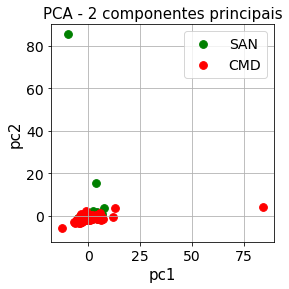

In [13]:
#dados normalizados
pca_1_normal = pd.DataFrame(data=X,columns = feat)

pca_1_y =  pd.DataFrame(data=y,columns = ['TARGET'])

#Faz de/para para gráfico
pca_1_y['TARGET'].replace(0,'SAN',inplace=True)
pca_1_y['TARGET'].replace(2,'CMD',inplace=True)

#pca_1_normal.tail(3)
#pca_1_y.tail(3)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

finalDf = pd.concat([principalDf, pca_1_y], axis = 1)

fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('PCA - 2 componentes principais', fontsize = 15)

targets = ['SAN','CMD']
colors = ['g','r']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['TARGET'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 60)
ax.legend(targets)
ax.grid()

finalDf.head(3)


total_taxa_explicada=0
for i in range(0,len(pca.explained_variance_ratio_)):
    total_taxa_explicada += pca.explained_variance_ratio_[i]

print("APLICANDO O PCA PARA 2 COMPONENTES:")
print(f'Variação explicada total_taxa_explicada: {round(total_taxa_explicada*100,2)}%')
print()

APLICANDO O PCA PARA 3 COMPONENTES:
Variação explicada total_taxa_explicada: 32.46%



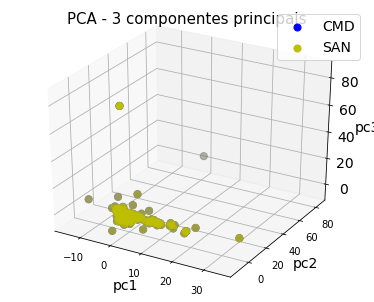

In [14]:
#Testa com 3 componentes
X = pca_1.loc[:, feat].values

# Separa target
y = pca_1.loc[:,['TARGET']].values

# Standardizing the features
X = StandardScaler().fit_transform(X)


pca_3 = PCA(n_components=3)
principalComponents_3 = pca_3.fit_transform(X)
principalDf_3 = pd.DataFrame(data = principalComponents_3
             , columns = ['pc1', 'pc2', 'pc3'])

finalDf_3 = pd.concat([principalDf_3, pca_1_y], axis = 1)
#finalDf_3.head(3)

x = []
y = []
z = []
for ls in principalComponents_3:
    x.append(ls[0])
    y.append(ls[1])
    z.append(ls[2])

colors = ['b', 'y', 'r', 'c', 'm', 'g', 'k', 'w']
aux = 0

classes = pca_1['TARGET'].value_counts()

fig = plt.figure()
ax = Axes3D(fig)

for c in classes.index:
    if c == 0:
        lb = 'SAN'
    else:
        lb = 'CMD'
    nodes = np.where(y == c)
    ax.scatter(z, x, y, s=50, color = colors[aux], label = lb)
    aux = aux + 1
    


total_taxa_explicada=0
for i in range(0,len(pca_3.explained_variance_ratio_)):
    total_taxa_explicada += pca_3.explained_variance_ratio_[i]

print("APLICANDO O PCA PARA 3 COMPONENTES:")
print(f'Variação explicada total_taxa_explicada: {round(total_taxa_explicada*100,2)}%')
print()

plt.legend()
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
ax.set_title('PCA - 3 componentes principais', fontsize = 15)
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.show(True)

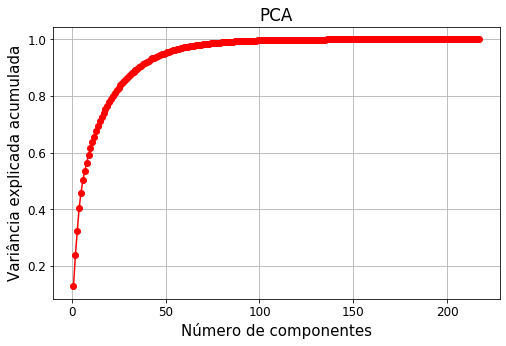

In [15]:
pca = PCA().fit(X)

ncomp = np.arange(1, np.shape(X)[0]+1)

plt.figure(figsize=(8,5))
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Número de componentes', fontsize=15)
plt.ylabel('Variância explicada acumulada', fontsize=15);
plt.xticks(color='k', size=12)
plt.yticks(color='k', size=12)
plt.title('PCA')
plt.grid(True)
plt.show(True)

In [17]:
# Verificando a influência dos atributos originais na composição dos elemntos do PCA
pca = PCA()
pca_result = pca.fit_transform(X)
var_exp = pca.explained_variance_ratio_

importances = var_exp
indices = np.argsort(importances)
attributes_rank = []

for i in indices:
    attributes_rank.append(pca_1.columns[i])


importancia =[]
for i in range(0,len(importances)):
    importancia.append(round(importances[i]*100,2))

DFimportancia = pd.DataFrame(data = importancia,columns=['importancia'])
DFimportancia.head(10)


attributes_rank.reverse()
feature = pd.DataFrame(data = attributes_rank,columns=['feature'])
#feature.head(3)

pca_importantes = pd.concat([feature, DFimportancia], axis = 1)
#pca_importantes.head()


#print("Selecionando features com importância acima de 2%")
#pca_importantes[pca_importantes['importancia']>0.0]
pca_importantes.loc[(pca_importantes['importancia']) > 0.18]

# plt.figure(figsize=(10, 30))
# plt.title('Feature Importances')
# plt.tight_layout()
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), attributes_rank, fontsize=20)
# plt.xlabel('Relative Importance',fontsize=20)
# plt.xticks(color='k', size=8)
# plt.yticks(color='k', size=8)
# plt.xlim([0.0, 0.25])
# plt.show()

,feature,importancia
0,idade,12.85
1,sexo,11.03
2,volume,8.58
3,massa,8.11
4,EDLEndo01,5.24
5,EDLEndo02,4.54
6,EDLEndo03,3.26
7,EDLEndo04,2.86
8,EDLEndo05,2.72
9,EDLEndo06,2.42


In [18]:
#Exporta dataset selecionado pela importancia do PCA:
colunas_pca = pca_importantes.loc[(pca_importantes['importancia']) > 0.18]
colunas_pca = colunas_pca['feature'].values

df_pca_features_importances = df_final_5[colunas_pca]


df_pca_features_importances = pd.concat([df_pca_features_importances,df_final_5['TARGET']],axis=1)


#exporta dataset final
df_pca_features_importances.to_csv("../EXPERIMENTOS/df_pca_features_importances_20200724.csv", index = False)

df_pca_features_importances.head(3)

,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01,EDLEpi02,EDLEpi03,EDLEpi04,EDLEpi05,EDLEpi06,EDLEpi07,EDLEpi08,EDLTotal01,EDLTotal02,EDLTotal03,EDLTotal04,EDLTotal05,EDLTotal06,EDLTotal07,EDLTotal08,HoughEndo,HoughEpi,HoughParede,OctEndoL0001,OctEndoL0002,OctEndoL0003,OctEndoL0004,OctEndoL0005,OctEndoL0006,OctEndoL0007,OctEndoL0008,OctEndoL0101,OctEndoL0102,OctEndoL0103,OctEndoL0104,OctEndoL0105,OctEndoL0106,OctEndoL0107,OctEndoL0108,OctEndoL0201,OctEndoL0202,OctEndoL0203,OctEndoL0204,OctEndoL0205,OctEndoL0206,OctEndoL0207,OctEndoL0208,TARGET
0,29,1,74,110,0.0,0.0,21.6,0.0,15.9,0.0,168.1,0.0,1.7,0.0,46.8,0.0,44.1,0.0,242.6,0.0,0.8,0.0,58.5,0.0,52.3,0.0,357.6,0.0,366,494,746,4613.575024,620.772723,-128.478244,1741.736528,820.994081,-194.455451,-893.706161,-2880.546754,-31333.486453,-9348.234722,-19886.166426,-32202.444288,23774.492630,-2039.030884,-7820.588517,-54260.616692,-219267.224862,15977.771925,-5553.094041,-16143.381328,-6.003135e+04,24624.669491,-113545.216604,40978.682158,0
1,31,1,94,126,16.1,0.0,133.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,199.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,284.0,0.0,0.0,0.0,0.0,0.0,256,339,515,4110.284760,2581.904972,2115.149206,2678.449058,3075.982431,2261.445944,974.364946,3940.765949,-11670.857764,243.913824,1163.431317,-6205.439566,-36073.821620,2962.174569,-323.072481,-28566.597544,4707.986180,2502.968905,-2648.434630,221.229844,2.986295e+05,2869.809056,-308.321098,1010.412981,0
2,27,1,92,157,33.4,0.0,84.4,0.0,0.0,0.0,44.5,0.0,47.9,0.0,121.9,0.0,7.9,0.0,67.0,0.0,71.4,0.0,177.2,0.0,6.2,0.0,95.2,0.0,299,383,589,7747.108917,1453.378375,3308.912672,4968.969514,3351.210180,2858.188459,1027.522900,4534.789217,-77073.346335,13293.203263,-22844.708313,-36559.548984,-99966.813018,-28216.773291,-5935.553381,-68238.215053,-100882.502833,-60587.608753,-39991.724443,-59588.752974,-1.180746e+06,32290.156248,8770.034503,3233.746138,0


In [49]:
#TESTA COM N QUANTIDADES DE COMPONENTES PRINCIPAIS

#Faz loop para nomear coluna de atributos
#n=169 # 100% variancia explicada - Só morfológicas dos extratores

#n-171  # 100% variancia explicada - TODAS

n=171

coluna_pca = []
for i in range(0,n):
     coluna_pca.append('pc' + str(i+1))


pca_n = PCA(n_components=n)
principalComponents_n = pca_n.fit_transform(X)
principalDf_n = pd.DataFrame(data = principalComponents_n
             , columns = coluna_pca)
finalDf_n = pd.concat([principalDf_n, pca_1_y], axis = 1)
finalDf_n.head(3)


total_taxa_explicada=0
for i in range(0,len(pca_n.explained_variance_ratio_)):
    total_taxa_explicada += pca_n.explained_variance_ratio_[i]

print(f'APLICANDO O PCA PARA {n}  COMPONENTES:')
print(f'Variação explicada total_taxa_explicada: {round(total_taxa_explicada*100,2)}%')
print()

APLICANDO O PCA PARA 171  COMPONENTES:
Variação explicada total_taxa_explicada: 100.0%



In [50]:
# 53 - 96.23%
# 50 - 95.59%
#        0.64    

In [51]:
#Faz de/para para ficar no mesmo padrão
finalDf_n['TARGET'].replace('SAN',0,inplace=True)
finalDf_n['TARGET'].replace('CMD',2,inplace=True)

#exporta dataset final
finalDf_n.to_csv("../EXPERIMENTOS/df_pca_pc171_20200724.csv", index = False)

finalDf_n.head(3)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60,pc61,pc62,pc63,pc64,pc65,pc66,pc67,pc68,pc69,pc70,pc71,pc72,pc73,pc74,pc75,pc76,pc77,pc78,pc79,pc80,pc81,pc82,pc83,pc84,pc85,pc86,pc87,pc88,pc89,pc90,pc91,pc92,pc93,pc94,pc95,pc96,pc97,pc98,pc99,pc100,pc101,pc102,pc103,pc104,pc105,pc106,pc107,pc108,pc109,pc110,pc111,pc112,pc113,pc114,pc115,pc116,pc117,pc118,pc119,pc120,pc121,pc122,pc123,pc124,pc125,pc126,pc127,pc128,pc129,pc130,pc131,pc132,pc133,pc134,pc135,pc136,pc137,pc138,pc139,pc140,pc141,pc142,pc143,pc144,pc145,pc146,pc147,pc148,pc149,pc150,pc151,pc152,pc153,pc154,pc155,pc156,pc157,pc158,pc159,pc160,pc161,pc162,pc163,pc164,pc165,pc166,pc167,pc168,pc169,pc170,pc171,TARGET
0,-0.380187,-1.242178,1.656273,1.436952,-2.881585,-0.296026,-0.326761,0.075733,0.345819,-1.314147,-1.199202,-1.809258,-1.215745,0.554991,-0.898355,1.809270,-1.370106,-0.407834,0.516249,0.762144,0.760071,-0.386916,0.500378,0.208870,0.926711,-0.465457,-0.909819,-0.998979,-1.478004,0.549851,-2.259767,0.213992,0.706730,2.513976,2.486516,-2.578991,-1.261951,1.876831,0.916690,-0.081742,0.197356,-1.121502,0.061510,-0.025660,0.898264,-1.581132,1.258550,-0.079780,-0.450627,-0.456926,1.651611,1.360396,-2.070125,2.168013,-1.859904,0.773647,2.023636,0.208878,0.078068,-0.136519,-1.281979,1.631606,-0.423091,-0.182835,-0.166340,-1.408543,1.789566,0.277617,2.126185,-0.431324,0.376540,0.443284,0.457321,-0.336270,0.422645,0.403088,-0.043012,1.302718,1.196340,0.692887,0.150287,-0.628400,-0.148945,0.003480,0.468951,0.079375,0.261159,0.333153,0.042082,0.192232,0.736592,0.560330,0.232523,-0.196133,-0.353674,0.468071,-0.639121,-0.175630,-0.591164,-0.054458,-0.267952,0.219529,-0.004976,0.500270,-0.275586,-0.154094,-0.343364,0.628734,-0.033027,0.098591,-0.232597,-0.146128,0.017378,0.149624,0.015580,0.010733,0.041825,-0.000168,-0.097127,-0.148700,-0.165996,0.011956,-0.030546,-0.04077,0.079062,-0.002190,-0.226151,-0.023409,0.070248,0.140633,-0.110412,0.069773,-0.165099,0.069097,0.146016,0.083607,0.096836,0.077886,0.016783,0.049004,0.061695,-0.179600,-0.002127,0.088379,-0.008247,-0.056600,0.028249,0.027076,-0.010262,-0.055739,0.039854,-0.020341,-0.082910,0.009907,-0.022115,0.016741,-0.032267,0.004182,-0.005712,0.038124,0.010068,-0.023401,0.004909,0.030365,0.050623,-0.063959,0.014799,-0.005881,0.008775,0.008888,-0.023351,0
1,1.277585,0.944967,-4.019557,-4.309071,2.642900,3.040449,-0.974737,-0.335067,0.237036,-0.914938,0.257727,1.488411,-1.165772,-0.306347,-0.651339,-0.807757,-0.259162,0.775281,-0.656361,-0.507846,-0.305599,-0.479725,1.155522,0.283810,0.032281,-0.655921,0.714738,-0.647112,0.051865,-0.058322,0.067174,-0.139913,0.760286,-0.688209,-0.003650,-0.100075,-0.296336,-0.247673,-0.544368,-0.050359,-0.468136,-0.133010,-0.526666,0.263931,-0.127086,-0.104291,-0.267823,0.033702,0.355893,0.556578,-0.194596,-0.457636,-0.276006,-0.103789,-0.498065,0.040775,-0.065971,-0.642662,-0.016508,-0.083729,-0.300310,-0.031980,0.204665,0.125391,0.148911,0.044482,0.116693,0.136113,0.257113,0.144135,0.037975,0.201504,0.081403,-0.366301,0.072678,0.008105,0.186414,0.091355,-0.480723,0.489690,-0.249155,-0.017145,-0.031860,0.027127,-0.072212,-0.132423,0.391404,-0.150084,0.216931,0.120563,-0.254734,-0.201429,0.005114,0.113060,0.191931,-0.236544,-0.042864,-0.212599,-0.054783,0.047204,0.408370,-0.250392,0.077663,-0.418717,-0.153563,0.169806,0.097535,-0.078328,0.138725,0.254236,-0.537133,-0.215005,-0.074850,-0.340749,-0.335965,0.097836,-0.067883,-0.035232,-0.298404,-0.453808,-0.239796,0.147671,0.157532,-0.29445,-0.231359,0.039916,-0.030464,0.501639,0.259046,0.125348,-0.148534,0.163511,0.149344,-0.057876,0.112124,0.075025,0.073437,0.080643,-0.064421,-0.004834,-0.155172,-0.098511,-0.008678,0.015348,0.065028,-0.109729,-0.029494,-0.212607,-0.185809,-0.009330,-0.012621,-0.022

## Seleção de Características

In [ ]:
#Total atributos menos o target
df_atual = pd.read_csv("../EXPERIMENTOS/df_final_20200724.csv")
total_atributos = len(df_atual.columns) -1

#Para a seleção utilizaremos noss "D" como a raiz quadrada do nosso total
#D_caracteristicas = int(np.sqrt(total_atributos))
n=53
D_caracteristicas = n

print(f'TOTAL CARACTERISTICAS: {total_atributos}')
print(f'CARACTERISTICAS UTILIZADAS NA SELEÇÃO DE FEATURES: {D_caracteristicas}')

### Select Kbest

In [ ]:
f_classif = SelectKBest(score_func = f_classif,k=D_caracteristicas)
#f_classif = SelectKBest(mutual_info_classif,k=D_caracteristicas)

x = df_atual.drop(['TARGET'],axis=1)
y = df_atual['TARGET']

fit = f_classif.fit(x,y)

features = fit.transform(x)
#print(features)

colunas = fit.get_support(indices=True)
df_novo = df_atual.iloc[:,colunas]
df_novo

df_novo_c_target = pd.concat([df_novo,df_atual['TARGET']],axis=1)
df_novo_c_target.head(3)

#exporta dataset final
df_novo_c_target.to_csv("../EXPERIMENTOS/df_kbest_fclassif_20200724.csv", index = False)
#df_novo_c_target.to_csv("../RESULTADOS/df_kbest_mutual_info_classif_20200522.csv", index = False)

df_novo_c_target.head()

### RFE

In [ ]:
#x = df_atual.drop(['TARGET'],axis=1)
#y = df_atual['TARGET']

#model = LogisticRegression(max_iter=80000)

#rfe = RFE(model,D_caracteristicas)

#fit = rfe.fit(x,y)

#features = fit.get_support(indices=True)

#df_novo_c_target = pd.concat([df_atual.iloc[:,features],df_atual['TARGET']],axis=1)

#df_novo_c_target.to_csv("../EXPERIMENTOS/df_RFE_morf_20200710.csv", index = False)

#df_atual.iloc[:,features].head(3)

### SFS

In [ ]:
#Método de distancia utilizada
#knn = KNeighborsClassifier(n_neighbors=2)
knn = KNeighborsClassifier(n_neighbors=5)
#knn = KNeighborsClassifier(n_neighbors=15)
#knn = KNeighborsClassifier(n_neighbors=30)
#knn = KNeighborsClassifier(n_neighbors=90)
#knn = KNeighborsClassifier(n_neighbors=100)
#knn = KNeighborsClassifier(n_neighbors=180)


x = df_atual.drop(['TARGET'],axis=1)
y = df_atual['TARGET']

sfs1 = SFS(knn, 
           k_features=D_caracteristicas, 
           forward=True, 
           floating=False, 
           verbose=0, # 0,1 ou 2 (Exibe a saida da do algoritmo)
           scoring='accuracy',
           cv=10,
           n_jobs=-1)

#PARAMETROS SELECIONADOS PARA OS ARQUIVOS DE TESTE,30,90,180:
#CV 0 E VIZINHO n_neighbors=(30,90,180) e floating = False


sfs1 = sfs1.fit(x, y)
#sfs1.k_feature_names_
sfs1.k_score_

In [ ]:
#CV 10 E VIZINHO   05  e floating = False = 79,26 #EXPORTADO PARA UTILIZAÇÃO

#CV 0 E VIZINHO    15  e floating = False = 81,56 #EXPORTADO PARA UTILIZAÇÃO
#CV 10 E VIZINHO   15  e floating = False = 80,67 #EXPORTADO PARA UTILIZAÇÃO

#CV 0 E VIZINHO    30  e floating = False = 76,03 #EXPORTADO PARA UTILIZAÇÃO
#CV 10 E VIZINHO   30  e floating = False = 74,61

#CV  0 E VIZINHO   90  e floating = False = 73,27 #EXPORTADO PARA UTILIZAÇÃO
#CV 10 E VIZINHO   90  e floating = False = 73,24

#CV  0 E VIZINHO  100  e floating = False = 71,88
#CV 10 E VIZINHO  100  e floating = False = 73,24

#CV  0 E VIZINHO  180  e floating = False = 73,73 #EXPORTADO PARA UTILIZAÇÃO
#CV 10 E VIZINHO  180  e floating = False = 74,71 #EXPORTADO PARA UTILIZAÇÃO

In [ ]:
df_novo_c_target = pd.concat([df_atual.iloc[:,list(sfs1.k_feature_idx_)],df_atual['TARGET']],axis=1)
df_atual.iloc[:,list(sfs1.k_feature_idx_)].head(3)
#df_novo_c_target

In [ ]:
#exporta dataset final
#df_novo_c_target.to_csv("../RESULTADOS/df_SFS_20200510.csv", index = False)

#TESTE COM MODIFICANDO QUANTIDADE DE VIZINHOS
df_novo_c_target.to_csv("../EXPERIMENTOS/df_SFS_morf_20200710_N5_CV10.csv", index = False)
#df_novo_c_target.to_csv("../RESULTADOS/df_SFS_20200523_N90.csv", index = False)
#df_novo_c_target.to_csv("../RESULTADOS/df_SFS_20200523_N180.csv", index = False)
#df_novo_c_target.to_csv("../RESULTADOS/df_SFS_20200523_N15_CV10.csv", index = False)
#df_novo_c_target.to_csv("../RESULTADOS/df_SFS_20200523_N15_CV00.csv", index = False)
#df_novo_c_target.to_csv("../RESULTADOS/df_SFS_20200523_N180_CV10.csv", index = False)